In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.phase_diagram import PhaseDiagram, PDPlotter
%matplotlib inline

## 创建相图对象

使用条目信息, 可以做非常复杂的分析, 比如绘制相图

In [2]:
a = MPRester()
entries = a.get_entries_in_chemsys(['Ca', 'C', 'O'])
pd = PhaseDiagram(entries)

In [3]:
pd

O-Ca-C phase diagram
6 stable phases: 
Ca, O2, CO2, CaO, CaCO3, C

## 绘制相图

**PDPlotter**可以调用相图对象绘制相图

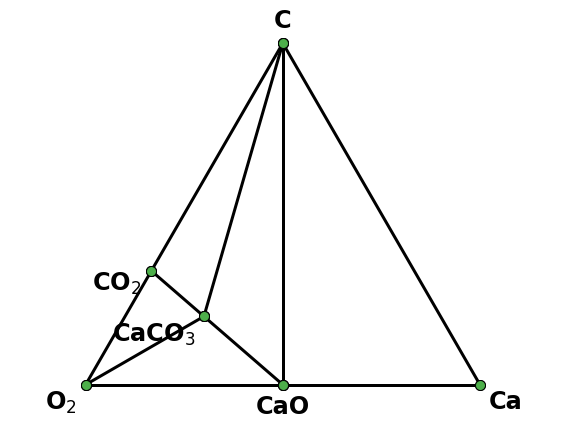

In [4]:
#Let's show all phases, including unstable ones
plotter = PDPlotter(pd, show_unstable=False)
plotter.show()

## 计算hull能(energy above hull)和其他的相平衡性质

To perform more sophisticated analyses, use the PDAnalyzer object.

In [5]:
import collections
data = collections.defaultdict(list)
for e in entries:
    decomp, ehull = pd.get_decomp_and_e_above_hull(e)
    data["Materials ID"].append(e.entry_id)
    data["Composition"].append(e.composition.reduced_formula)
    data["Ehull"].append(ehull)    
    data["Decomposition"].append(" + ".join(["%.2f %s" % (v, k.composition.formula) for k, v in decomp.items()]))

In [6]:
from pandas import DataFrame
df = DataFrame(data, columns=["Materials ID", "Composition", "Ehull", "Decomposition"])
print(df)

    Materials ID Composition     Ehull                          Decomposition
0       mp-10683          Ca  0.418517                               1.00 Ca1
1     mp-1067285          Ca  0.293998                               1.00 Ca1
2     mp-1008498          Ca  0.175890                               1.00 Ca1
3     mp-1064227          Ca  0.018656                               1.00 Ca1
4         mp-166          Ca  0.037150                               1.00 Ca1
5         mp-132          Ca  0.024417                               1.00 Ca1
6          mp-21          Ca  0.037048                               1.00 Ca1
7     mp-1078638          Ca  0.046812                               1.00 Ca1
8          mp-45          Ca  0.000000                               1.00 Ca1
9      mp-611448           C  0.140775                                1.00 C4
10     mp-990424           C  0.003576                                1.00 C4
11     mp-568286           C  0.005546                          